Epoch 1/20
282/282 [==============================] - 17s 14ms/step - loss: 0.0561 - val_loss: 0.0407
Epoch 2/20
282/282 [==============================] - 2s 6ms/step - loss: 0.0394 - val_loss: 0.0400
Epoch 3/20
282/282 [==============================] - 2s 7ms/step - loss: 0.0394 - val_loss: 0.0397
Epoch 4/20
282/282 [==============================] - 2s 7ms/step - loss: 0.0394 - val_loss: 0.0397
Epoch 5/20
282/282 [==============================] - 2s 7ms/step - loss: 0.0394 - val_loss: 0.0402
Epoch 6/20
282/282 [==============================] - 3s 11ms/step - loss: 0.0394 - val_loss: 0.0398
Epoch 7/20
282/282 [==============================] - 2s 6ms/step - loss: 0.0393 - val_loss: 0.0402
Epoch 8/20
282/282 [==============================] - 2s 6ms/step - loss: 0.0391 - val_loss: 0.0402
Epoch 9/20
282/282 [==============================] - 2s 7ms/step - loss: 0.0393 - val_loss: 0.0393
Epoch 10/20
282/282 [==============================] - 2s 6ms/step - loss: 0.0389 - val_loss: 0.0

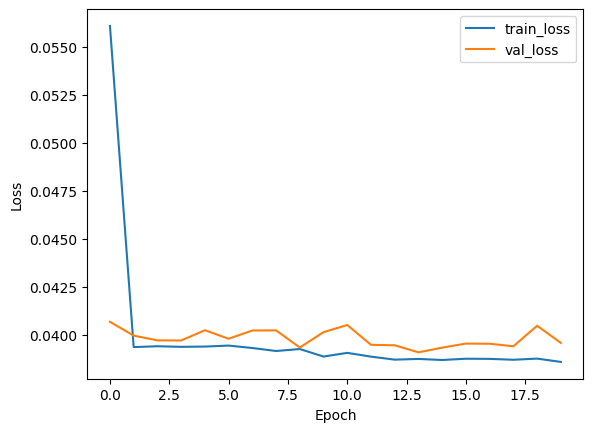

In [2]:
# Імпорт необхідних бібліотек
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Bidirectional
import matplotlib.pyplot as plt

# Генерація даних
N = 10000
data = np.array([np.sin(x/5) + np.random.normal(scale=0.1) for x in range(N)])

# Побудова моделі
model = Sequential([
    Bidirectional(GRU(units=64, return_sequences=True), input_shape=(None, 1)),
    Bidirectional(GRU(units=32)),
    Dense(units=1)
])

# Компіляція моделі
model.compile(loss='mse', optimizer='adam')

# Тренування моделі
history = model.fit(data[:-1].reshape(-1, 1, 1), data[1:].reshape(-1, 1), epochs=20, batch_size=32, validation_split=0.1)

# Візуалізація результатів
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
